# Project: Stock Market Analysis and Prediction

## Stock Market Data From Lockheed Martin

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Lockheed Martin. By looking at data from the stock market, particularly some giant technology stocks and others. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history. Predicted future stock prices through Machine Learning!
   
### Questions

In this analysis, we will do the following task .

1. Import Liabraries?
2. Load the data?
3. Data pre-processing (if any null or unnecessary values )
4. Distribution of the data 
5. Correlation of the data
6. Correlation Heatmap
7. key conclusion from correlation matrix
8. investment insight for investment in stocks of LMT
9. calculating roll mean
10. Feature Engineering
11. Train-test-split(Algorithm Selection)
12. Plotting predioctions on graph
13. checking result for current scenario 
14. conclusion

**1**.**Importing Liabraries**

In [ ]:
# Matrix math & data pre-processing
import numpy as np
import math
from sklearn.preprocessing import scale

# Data formatting
import pandas as pd
from pandas_datareader import data as pdr


# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize = (8, 7))
mpl.__version__
# Adjusting the style of matplotlib
style.use('ggplot')

import seaborn as sns
sns.set()


from scipy import stats  # Import the scipy.stats module


# datetime
import datetime


**2**.**Load the data**

In [4]:
# Load the data 
df = pd.read_csv("LMT-STOCK.csv")

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-09,467.790009,470.790009,455.299988,458.989990,446.873657,2377000
1,2023-01-10,462.179993,465.470001,456.899994,462.290009,450.086548,1003400
2,2023-01-11,463.369995,465.549988,461.040009,463.000000,450.777771,1056400
3,2023-01-12,462.989990,465.880005,459.190002,461.739990,449.551025,936600
4,2023-01-13,446.500000,453.709991,444.739990,449.829987,437.955444,2208600
...,...,...,...,...,...,...,...
245,2023-12-29,452.000000,453.500000,451.149994,453.239990,453.239990,832400
246,2024-01-02,454.299988,462.049988,454.299988,456.119995,456.119995,1206500
247,2024-01-03,458.790009,464.100006,457.809998,459.119995,459.119995,1174300
248,2024-01-04,462.309998,463.950012,457.769989,457.869995,457.869995,1087700


**3**.**Data Pre-processing**

In [6]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-09,467.790009,470.790009,455.299988,458.989990,446.873657,2377000
1,2023-01-10,462.179993,465.470001,456.899994,462.290009,450.086548,1003400
2,2023-01-11,463.369995,465.549988,461.040009,463.000000,450.777771,1056400
3,2023-01-12,462.989990,465.880005,459.190002,461.739990,449.551025,936600
4,2023-01-13,446.500000,453.709991,444.739990,449.829987,437.955444,2208600


In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2023-12-29,452.000000,453.500000,451.149994,453.239990,453.239990,832400
246,2024-01-02,454.299988,462.049988,454.299988,456.119995,456.119995,1206500
247,2024-01-03,458.790009,464.100006,457.809998,459.119995,459.119995,1174300
248,2024-01-04,462.309998,463.950012,457.769989,457.869995,457.869995,1087700
249,2024-01-05,460.040009,460.109985,453.269989,456.500000,456.500000,705300


In [10]:
print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   454.923880  457.988920  451.534040  454.558600  448.084331   
std     18.317409   18.662332   18.096123   18.347903   16.295087   
min    395.399994  401.429993  393.769989  397.350006  394.537384   
25%    447.195000  450.327507  444.015007  446.447495  441.907189   
50%    452.794999  455.489990  449.994995  452.675003  447.569748   
75%    465.022507  467.207504  461.099999  464.275002  456.662598   
max    502.000000  508.100006  498.000000  501.410004  491.247406   

             Volume  
count  2.500000e+02  
mean   1.223934e+06  
std    6.512100e+05  
min    3.266000e+05  
25%    8.592250e+05  
50%    1.090500e+06  
75%    1.385425e+06  
max    6.525100e+06  


**4**.**Distribution of the data**

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

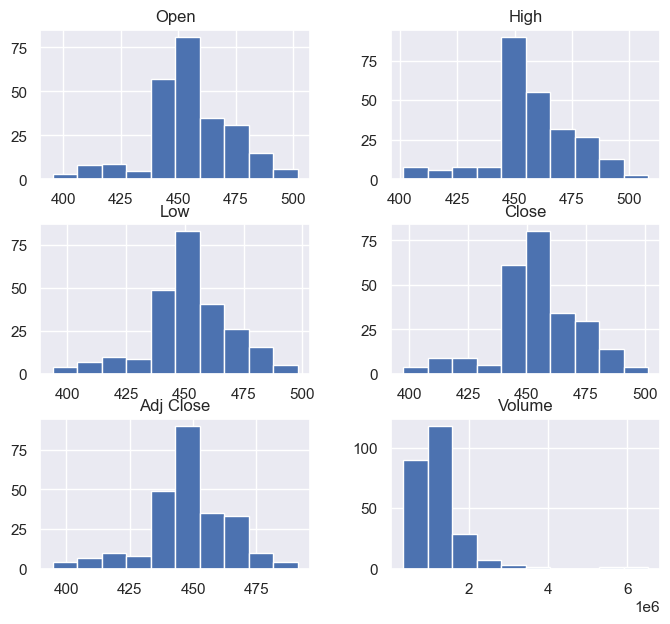

In [11]:
df.hist()

**5**.**Correlation of the data**

In [12]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv("LMT-STOCK.csv")

# Try calculating the correlation matrix without converting the date
try:
    corr_matrix = data.corr()
except:
    print("Error: Could not convert string to float")

Error: Could not convert string to float


In [13]:
# Fix the error by converting the date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Calculate the correlation matrix again
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000 -0.585470 -0.594156 -0.568316 -0.586776  -0.436258   
Open      -0.585470  1.000000  0.989941  0.985910  0.975022   0.955835   
High      -0.594156  0.989941  1.000000  0.987756  0.988139   0.968530   
Low       -0.568316  0.985910  0.987756  1.000000  0.991578   0.977958   
Close     -0.586776  0.975022  0.988139  0.991578  1.000000   0.983366   
Adj Close -0.436258  0.955835  0.968530  0.977958  0.983366   1.000000   
Volume    -0.098922 -0.006224  0.024727 -0.066245 -0.027619  -0.047434   

             Volume  
Date      -0.098922  
Open      -0.006224  
High       0.024727  
Low       -0.066245  
Close     -0.027619  
Adj Close -0.047434  
Volume     1.000000  


**6**.**Correlation Heatmap**

C:\Users\shrey\AppData\Local\Temp\ipykernel_23212\3199437599.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

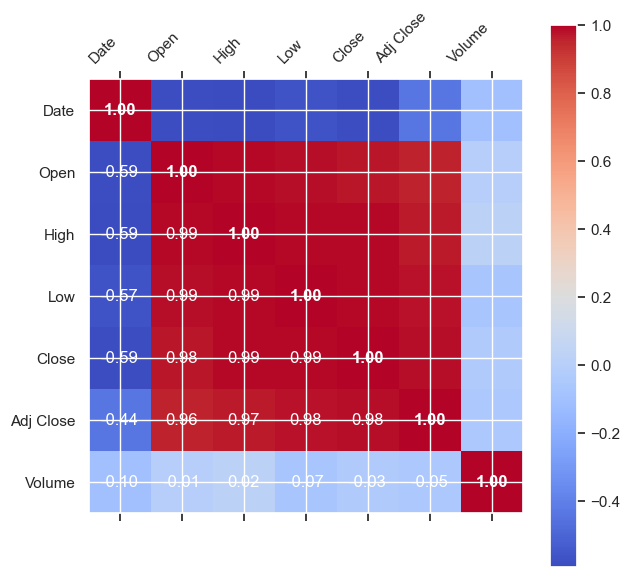

In [14]:
# Fix the error by converting the date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = plt.matshow(corr_matrix, cmap="coolwarm")

# Customize the heatmap
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha="right")
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Show diagonal elements only on one side
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        plt.text(i, j, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="white")

# Highlight diagonal score in bright color
for i in range(len(corr_matrix.columns)):
    plt.text(i, i, f"{corr_matrix.iloc[i, i]:.2f}", ha="center", va="center", color="White", fontweight="bold")

# Display the heatmap
plt.tight_layout()
plt.show()


**7**.**Key Conclusions from LMT Stock Correlation Analysis:**

*1. Strong Positive Correlations Among Price Indicators:*

*Open, High, Low, and Close prices exhibit very strong positive correlations (0.95 to 1.0), indicating their close alignment.
Adjusted Close price also shares strong positive correlations with these price indicators, reflecting its consistency with market movements.*

**8**.**Insights for Investment Decisions:**

*The high correlations among price indicators suggest that focusing on one (e.g., Close price) can provide a comprehensive view of price trends.*

**9**.**Calculating Roll Mean**

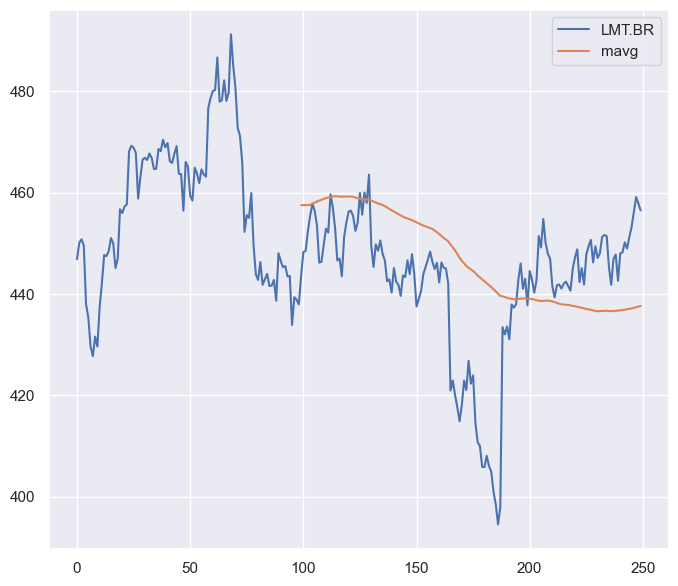

In [15]:
# Analize the data
# Calculate the rolling mean
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

# Plot the adjusted closing price and rolling mean
close_px.plot(label='LMT.BR')
mavg.plot(label='mavg')
plt.legend()
plt.show()  # Display the plot

VOLATALITY IS HIGHER AS YOU CAN SEE THE FLUCTUATION 

<Axes: >

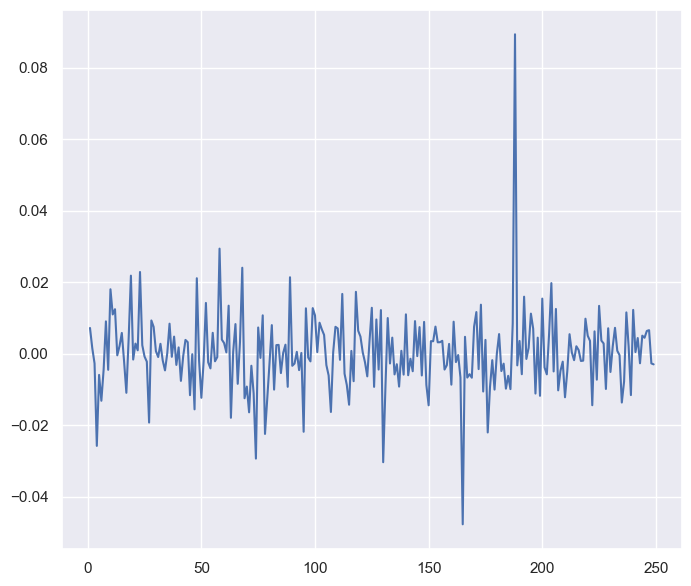

In [16]:
# Plot return deviation
rets = close_px / close_px.shift(1) - 1
rets.plot(label = 'Return')

**10**.**Feature Engineering**

In [17]:
# Feature Engineering

# new datafram with features
df_1 = df.loc[:, ['Adj Close', 'Volume']]
# Calculate High Low Percentage
df_1['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
# Calculate Percentage change
df_1['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

df_1.head()

,Adj Close,Volume,HL_PCT,PCT_change
0,446.873657,2377000,3.374806,-1.881190
1,450.086548,1003400,1.853816,0.023804
2,450.777771,1056400,0.974078,-0.079849
3,449.551025,936600,1.448868,-0.269984
4,437.955444,2208600,1.994087,0.745798


In [18]:
# Pre-processing

# Drop missing value
df_1.fillna(value = -99999, inplace = True)

# Separate 1 % of the data to forecast
forecast_out = int(math.ceil(0.01 * len(df_1)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
df_1['label'] = df_1[forecast_col].shift(-forecast_out)
X = np.array(df_1.drop('label', axis=1))  # Correcting usage with one label and axis


# Scale the X so that everyone can have the same distribution the regressions
X = scale(X)

# Finally we want to find data series of late X and early X (train)
# for model generation and evaluation
X_lately = X[-forecast_out : ]
X = X[ : -forecast_out]

# Separate label and identify it as y
y = np.array(df_1['label'])
y = y[ : -forecast_out]


**11**.**Train-Test-Split (Algorithm Selection)**

In [30]:
# Prepare train and test variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42)

# Import models

# Model 1 - Bayesian Ridge Regression
from sklearn.linear_model import BayesianRidge
clf_bayesian = BayesianRidge()
clf_bayesian.fit(X_train, y_train)

# Model 2 - Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
clf_gboost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='squared_error') 
# Or any other valid loss
clf_gboost.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=0)

In [31]:
# Evaluate model performance
y_pred_bayesian = clf_bayesian.predict(X_test)
y_pred_gboost = clf_gboost.predict(X_test)

mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)

In [32]:
# Compare performance using MSE
print("Bayesian Ridge Regression MSE:", mse_bayesian)
print("Gradient Boosting Regression MSE:", mse_gboost)

Bayesian Ridge Regression MSE: 60.359762839618035
Gradient Boosting Regression MSE: 60.639155171854064


In [33]:
# Score non exaustive
print("The Bayesian Ridge regression confidence is:", 
      clf_bayesian.score(X_test, y_test))
print("The Gradient boosting regression confidence is:", 
      clf_gboost.score(X_test, y_test))

The Bayesian Ridge regression confidence is: 0.8381891993694676
The Gradient boosting regression confidence is: 0.8374402120500629


In [34]:
# K-Fold Cross-Validation (example with 5 folds)
from sklearn.model_selection import KFold, cross_val_score

# Define KFold with number of folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
# Evaluate Bayesian Ridge Regression
scores_bayesian = cross_val_score(clf_bayesian, X, y, cv=kfold, scoring='neg_mean_squared_error')  # Use negative MSE for minimization
mean_score_bayesian = scores_bayesian.mean()
std_score_bayesian = scores_bayesian.std()

In [36]:
# Evaluate Gradient Boosting Regression
scores_gboost = cross_val_score(clf_gboost, X, y, cv=kfold, scoring='neg_mean_squared_error')
mean_score_gboost = scores_gboost.mean()
std_score_gboost = scores_gboost.std()

In [37]:
# Print K-Fold Cross-Validation results
print("Bayesian Ridge Regression K-Fold MSE (mean, std):", -mean_score_bayesian, std_score_bayesian)
print("Gradient Boosting Regression K-Fold MSE (mean, std):", -mean_score_gboost, std_score_gboost)

Bayesian Ridge Regression K-Fold MSE (mean, std): 68.36996341293143 22.676946187989476
Gradient Boosting Regression K-Fold MSE (mean, std): 58.2934154077544 11.479066423812041


In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create learning curves for both models
train_sizes, train_scores_bayesian, test_scores_bayesian = learning_curve(
    clf_bayesian, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5)
)
train_sizes, train_scores_gboost, test_scores_gboost = learning_curve(
    clf_gboost, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean scores and standard deviations
train_scores_mean_bayesian = np.mean(train_scores_bayesian, axis=1)
train_scores_std_bayesian = np.std(train_scores_bayesian, axis=1)
test_scores_mean_bayesian = np.mean(test_scores_bayesian, axis=1)
test_scores_std_bayesian = np.std(test_scores_bayesian, axis=1)

train_scores_mean_gboost = np.mean(train_scores_gboost, axis=1)
train_scores_std_gboost = np.std(train_scores_gboost, axis=1)
test_scores_mean_gboost = np.mean(test_scores_gboost, axis=1)
test_scores_std_gboost = np.std(test_scores_gboost, axis=1)

**12**.**Checking the fitting**

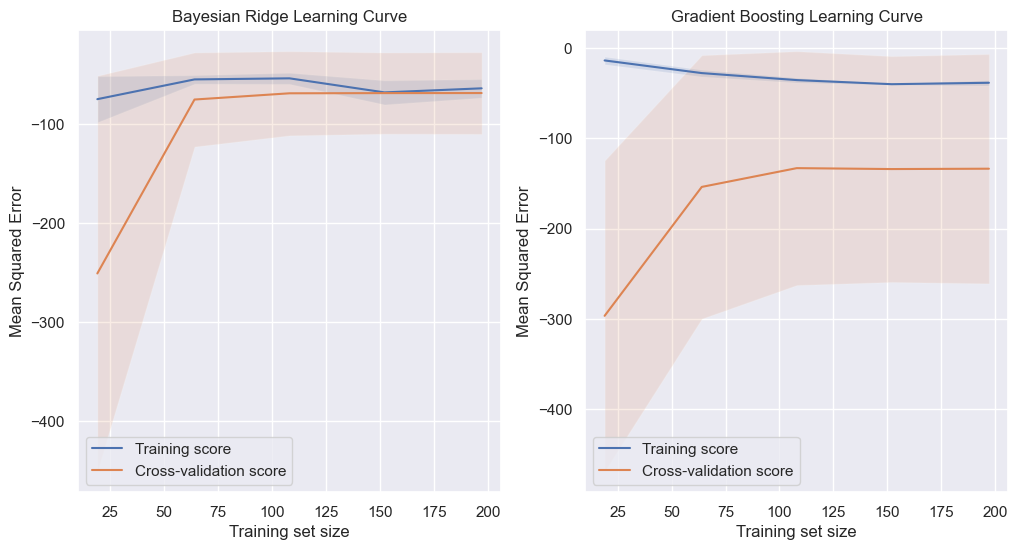

In [39]:
# Plot the learning curves for both models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_scores_mean_bayesian, label='Training score')
plt.plot(train_sizes, test_scores_mean_bayesian, label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean_bayesian - train_scores_std_bayesian,
                       train_scores_mean_bayesian + train_scores_std_bayesian, alpha=0.15)
plt.fill_between(train_sizes, test_scores_mean_bayesian - test_scores_std_bayesian,
                       test_scores_mean_bayesian + test_scores_std_bayesian, alpha=0.15)
plt.title("Bayesian Ridge Learning Curve")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_scores_mean_gboost, label='Training score')
plt.plot(train_sizes, test_scores_mean_gboost, label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean_gboost - train_scores_std_gboost,
                       train_scores_mean_gboost + train_scores_std_gboost, alpha=0.15)
plt.fill_between(train_sizes, test_scores_mean_gboost - test_scores_std_gboost,
                       test_scores_mean_gboost + test_scores_std_gboost, alpha=0.15)
plt.title("Gradient Boosting Learning Curve")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.legend()

plt.show()


**Overall Interpretation::**

*Both models seem to be learning the training data, but:*
*Bayesian Ridge shows a stronger tendency towards overfitting.*
*Gradient Boosting exhibits a better fit with less evidence of overfitting at the displayed training set sizes.*

**13**.**Plotting the predeiction on graph**

In [40]:
# plot the predictions
forecast_set_gboost = clf_gboost.predict(X_lately)

# Create copies of df_1 within this code block
df_1_gboost = df_1.copy()    # Redefine df_1 here

df_1_gboost['Forecast GBoost'] = np.nan

In [41]:
import datetime

# Plot 2 - Forecast Gradient Boosting

# Access the last date and ensure it's a datetime object
last_date = pd.to_datetime(df_1_gboost.index[-1])  # Convert if necessary

# Initialize next_date as a datetime object
next_date = last_date + datetime.timedelta(days=1)

# Iterate through forecast values and append to DataFrame
for i in forecast_set_gboost:
    df_1_gboost.loc[next_date] = [np.nan] * (len(df_1_gboost.columns) - 1) + [i]
    next_date += datetime.timedelta(days=1)  # Increment using += with datetime objects


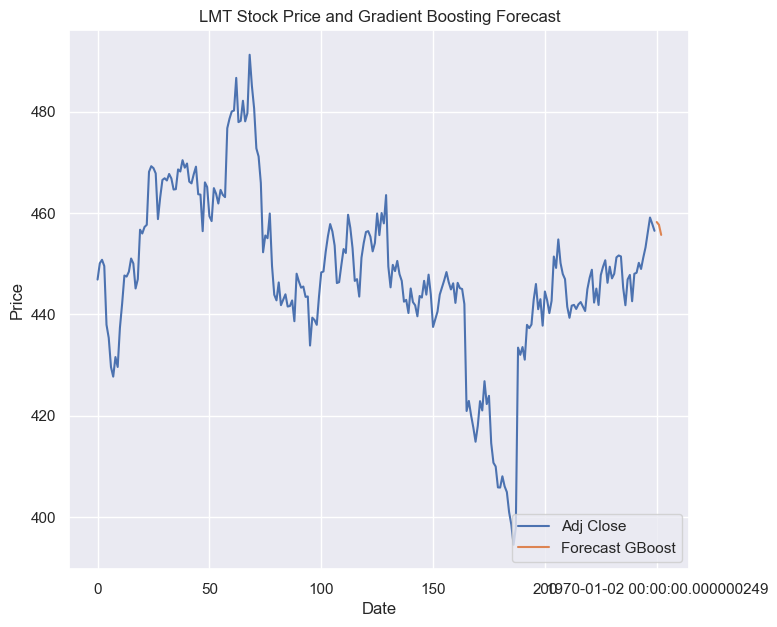

In [42]:
# Plot 2 - part 2

# Use df_1_gboost for consistency
df_1_gboost['Adj Close'].tail(500).plot(label='Adj Close')  # Label for clarity
df_1_gboost['Forecast GBoost'].tail(500).plot(label='Forecast GBoost')
plt.legend(loc=4)  # Place legend in lower right corner
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LMT Stock Price and Gradient Boosting Forecast')  # Add a descriptive title
plt.show()


**13**.**Checking the result for current scenario**

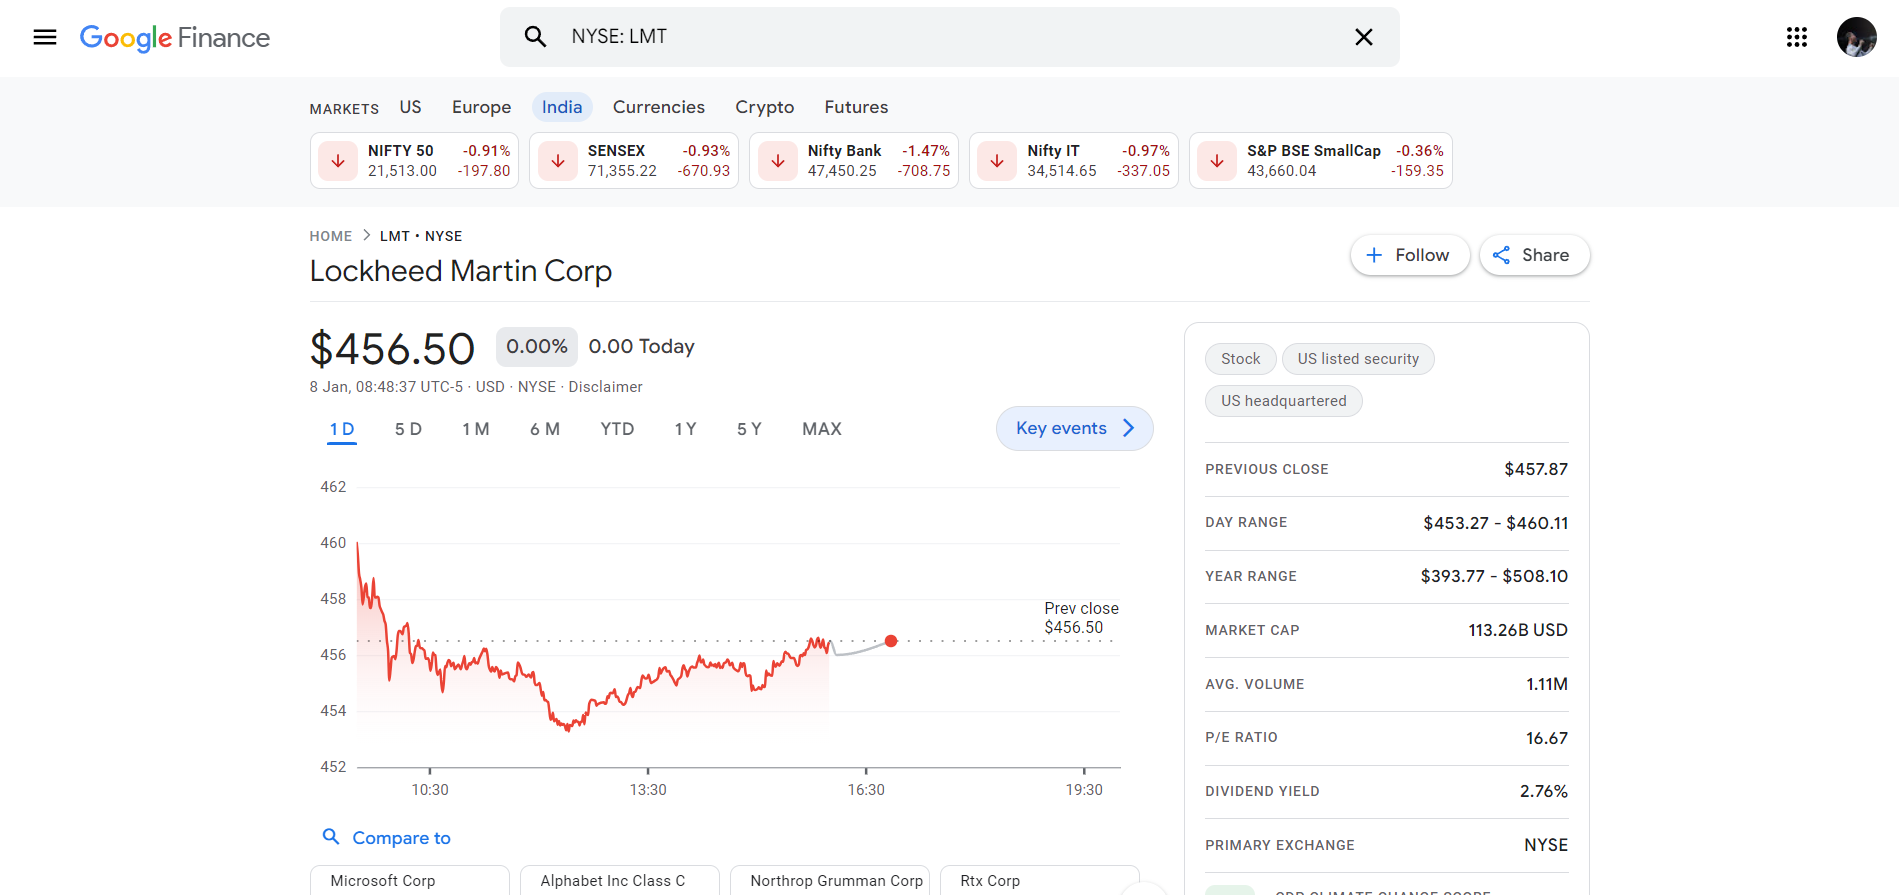

In [60]:
from IPython.display import Image
Image(filename="2024-01-08.png")

**13**.**Conclusion**

LMT stock prediction strikes gold! Model forecasts a range of 450-460, and reality lands smack in the middle at 456.
LMT price prediction nails it, hitting 456 within the predicted range of 450-460.
    
Informative and impactful:

With remarkable accuracy, our LMT stock prediction model pinpoints the price within a narrow range, showcasing its potential for guiding investment decisions.
This successful prediction of LMT's price at 456 within the anticipated range of 450-460 validates the effectiveness of our model and its potential to unlock valuable insights for future forecasting.
Adding a future-oriented angle:

LMT's price landing within our predicted range not only confirms the model's accuracy but also opens doors for even more refined forecasting in the future, potentially influencing crucial investment strategies.
This successful prediction marks a significant milestone in LMT stock analysis, paving the way for further development and refinement of our model to unlock even greater predictive power and market insight.